In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_frame = pd.read_csv('WELLCOME_Trust.csv',
                         encoding='ISO-8859-1')
# fixes decoding error
data_frame.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
data_frame.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [4]:
# Change column name case and rename for consistency and simplicity
# and assign the resultind set to 'df' to keep the original data unaltered
df = data_frame.rename(columns = {'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'})


In [17]:
df.columns = map(str.upper, df.columns)

In [18]:
df.columns

Index(['PMID/PMCID', 'PUBLISHER', 'JOURNAL TITLE', 'ARTICLE TITLE', 'COST'], dtype='object')

In [19]:
df.head()

,PMID/PMCID,PUBLISHER,JOURNAL TITLE,ARTICLE TITLE,COST
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


<h2>Challenge:</h2>
<h3>
<ol>1. Determine the five most common journals and the total articles for each.</ol>
<ol>2. Calculate the mean, median, and standard deviation of the open-access cost per article for each journal</ol>
</h3>
<p>Let's diagnose the data and clean issues to be able to make the analysis needed to answer the questions</P>


In [20]:
# checking data types
df.dtypes

PMID/PMCID       object
PUBLISHER        object
JOURNAL TITLE    object
ARTICLE TITLE    object
COST             object
dtype: object

In [21]:
# Change the data type of the cost column to float and remove the '£' sign
# so that math calculations can be done 

df['COST'] = df.COST.str.replace('£','')
df['COST'] = df.COST.str.replace('$','')


In [22]:
df['COST'] = df.COST.astype(float)

In [23]:
df.dtypes

PMID/PMCID        object
PUBLISHER         object
JOURNAL TITLE     object
ARTICLE TITLE     object
COST             float64
dtype: object

In [24]:
# Check for missing data
df.isnull().sum()

PMID/PMCID       199
PUBLISHER          0
JOURNAL TITLE      1
ARTICLE TITLE      0
COST               0
dtype: int64

In [26]:
# Replace the null value in the Journal title column with 'Other journal'
# we'll leave the PMID/PMCID column NaN values as they are  
df['JOURNAL TITLE'].replace(np.NaN,'Other', inplace=True)

In [27]:
df.isnull().sum()

PMID/PMCID       199
PUBLISHER          0
JOURNAL TITLE      0
ARTICLE TITLE      0
COST               0
dtype: int64

In [28]:
pd.value_counts(df['JOURNAL TITLE'].values).head(20)

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
PLoS Neglected Tropical Diseases                   18
Human Molecular Genetics                           18
Nature Communications                              17
PLoS Genetics                                      15
Neuroimage                                         15
PLoS Pathogens                                     15
PLOS ONE                                           14
NeuroImage                                         14
BMC Public Health                                  14
Brain                                              14
Movement Disorders                                 13
Developmental Cell                                 12
Biochemical Journal                                12
Journal of Neuroscience     

<p>In the value count above, the same journal Plos One is represented multiple times because of how it is capitalized. This can be fixed by replacing different namings by a single type.</P> 

In [62]:
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['PLOSONE', 'PLoS ONE', 'PLoS One', 'PLoS ONE' 'PLOS  ONE', 'PLOS 1', 'PLOS'], 'PLOS ONE')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['ACTA D', 'ACTA CRYSTALLOGRAPHICA SECTION D', 'ACTA CRYSTALLOGRAPHY D', 'ACTA CRYSTALLOGRAPHICA, SECTION D', 'ACTA CRYSTALLOGRAPHICA SECTION D,  BIOLOGICAL CRYSTALLOGRAPHY'], 'ACTA CRYSTALLOGRAPHICA SECTION D: BIOLOGICAL CRYSTALLOGRAPHY')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['AMERICAN JNL EPIDEMIOLOGY'], 'AMERICAN JOURNAL OF EPIDEMIOLOGY')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['AMERICAN JOURNAL OF MEDICAL GENETICS PART A'], 'AMERICAN JOURNAL OF MEDICAL GENETICS')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['ANTIMICROBIAL AGENTS AND CHEMOTHERAPY', 'ANTIMICROBIAL AGFENTS AND CHEMOTHERAPY'], 'ANTIMICROBIAL AGENTS & CHEMOTHERAPY')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['ANGEWANDE CHEMIE', 'ANGEWANDTE CHEMIE INTERNATIONAL EDITION','ANGEW CHEMS INT ED' ], 'ANGEWANDTE CHEMIE')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['BEHAVIOUR RESEARCH AND THERAPY'], 'BEHAVIOR RESEARCH & THERAPY')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['BIOCHEM JOURNAL', 'BIOCHEMICAL JOURNALS'], 'BIOCHEMICAL JOURNAL')
df['JOURNAL TITLE'] = df['JOURNAL TITLE'].replace(['ACS Nano'], 'ACS NANO')

In [63]:
print('The five most common journals with total number of articles for each')
counts = pd.value_counts(df['JOURNAL TITLE'].values)
counts.head(5)

The five most common journals with total number of articles for each


PLOS ONE                                           170
Journal of Biological Chemistry                     48
Nucleic Acids Research                              21
Proceedings of the National Academy of Sciences     19
Human Molecular Genetics                            18
dtype: int64

<h4>Calculate the mean, median, and standard deviation of the open-access cost per article for each journal
</h4>

The box plot below shows outliers which are much away from where the rest of the data clusters


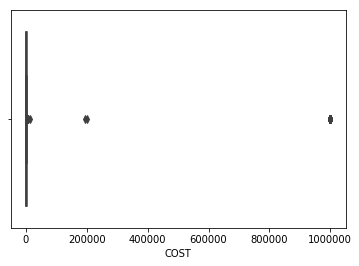

In [64]:
# Check for outliers
sns.boxplot(x=df['COST']);
print('The box plot below shows outliers which are much away from where the rest of the data clusters')

The outliers are best visualized with the histogram below


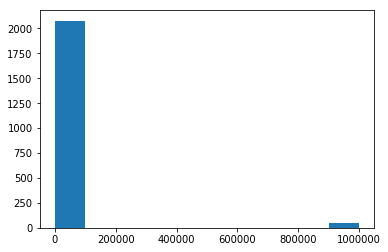

In [65]:
print('The outliers are best visualized with the histogram below')
plt.hist(df.COST)
plt.show()

In [66]:
df.COST.describe()

count      2127.000000
mean      24067.339972
std      146860.665559
min           0.000000
25%        1280.000000
50%        1884.010000
75%        2321.305000
max      999999.000000
Name: COST, dtype: float64

In [67]:
# The .99 quantile has the oulier value 
lower_bound = 0
upper_bound = .99
data_range = df.COST.quantile([lower_bound, upper_bound])
data_range 

0.00         0.0
0.99    999999.0
Name: COST, dtype: float64

In [68]:
# create boolean based array to separate outliers from the rest of the data
true_index = (df.COST.values < data_range.loc[upper_bound])
true_index

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
false_index = ~true_index
false_index

array([False, False, False, ..., False, False, False])

In [70]:
df.COST[true_index].describe()

count      2080.000000
mean       2015.038038
std        6100.422956
min           0.000000
25%        1268.700000
50%        1852.505000
75%        2302.930000
max      201024.000000
Name: COST, dtype: float64

In [71]:
# we have 47 entries of outliers. Droping them might affect the outcome 
# instead we'll replace them with the mean of the rest of data
df.COST[false_index].describe()

count        47.0
mean     999999.0
std           0.0
min      999999.0
25%      999999.0
50%      999999.0
75%      999999.0
max      999999.0
Name: COST, dtype: float64

In [72]:
mean = df[false_index] # replace outliers with the mean
df.describe()

,COST
count,2127.000000
mean,24067.339972
std,146860.665559
min,0.000000
25%,1280.000000
50%,1884.010000
75%,2321.305000
max,999999.000000


In [73]:
# mean cost per journal
df_mean_by_journal = df.groupby('JOURNAL TITLE')['COST'].mean()
df_mean_by_journal.head()#.describe()

JOURNAL TITLE
ACS Chemical Biology         1418.186
ACS Chemical Neuroscience    1186.800
ACS NANO                      668.140
ACTA F                        754.900
AGE                          2002.000
Name: COST, dtype: float64

In [74]:
# Get the number of articles in each journal
article_per_journal = df.groupby('JOURNAL TITLE')['ARTICLE TITLE'].count()


In [75]:
# Divide mean per journal by the number of articles to get mean per article 
print('Mean cost per article for each journal')
mean_per_article = df_mean_by_journal / article_per_journal
mean_per_article.head(10)

Mean cost per article for each journal


JOURNAL TITLE
ACS Chemical Biology          283.637200
ACS Chemical Neuroscience    1186.800000
ACS NANO                      334.070000
ACTA F                        754.900000
AGE                          2002.000000
AIDS                          686.435556
AIDS Behav                   1834.770000
AIDS Care                    1094.585000
AIDS Journal                 2015.720000
AIDS Research and Therapy    1240.000000
dtype: float64

In [76]:
# median cost per journal
df_median_by_journal = df.groupby('JOURNAL TITLE')['COST'].median()

In [77]:
print('Median cost per article for each journal')
median_per_article = df_median_by_journal / article_per_journal
median_per_article.head(10)

Median cost per article for each journal


JOURNAL TITLE
ACS Chemical Biology          258.918
ACS Chemical Neuroscience    1186.800
ACS NANO                      334.070
ACTA F                        754.900
AGE                          2002.000
AIDS                          656.210
AIDS Behav                   1834.770
AIDS Care                    1094.585
AIDS Journal                 2015.720
AIDS Research and Therapy    1240.000
dtype: float64

In [78]:
# std cost per journal
df_std_by_journal = df.groupby('JOURNAL TITLE')['COST'].std(ddof=0)

In [79]:
print('Std cost per article for each journal')
std_per_article = df_std_by_journal / article_per_journal
std_per_article.head(10)

Std cost per article for each journal


JOURNAL TITLE
ACS Chemical Biology         90.750293
ACS Chemical Neuroscience     0.000000
ACS NANO                     12.625000
ACTA F                        0.000000
AGE                           0.000000
AIDS                         76.497015
AIDS Behav                    0.000000
AIDS Care                    21.785000
AIDS Journal                  0.000000
AIDS Research and Therapy     0.000000
dtype: float64